# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 2

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
def MLPReg(N2, momentum, learning_rate, epochs):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
def MLPClassif(N2, momentum, learning_rate, epochs):
    return MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

In [3]:
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, funcion_error):
    error_val = []
    error_train = []
    error_test = []
    min_error_val = float('inf')

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        aux_err_val = funcion_error(y_val, red.predict(X_val))

        if aux_err_val < min_error_val:
            min_error_val = aux_err_val
            best_red = copy.deepcopy(red)

        error_val.append(aux_err_val)
        error_train.append(funcion_error(y_train, red.predict(X_train)))
        error_test.append(funcion_error(y_test, red.predict(X_test)))

    return best_red, error_train, error_val, error_test

def error_regresion(y, y_pred):
    return sk.metrics.mean_squared_error(y, y_pred)

def error_clasificacion(y, y_pred):
    return sk.metrics.zero_one_loss(y, y_pred)

def entrenar_red_regresion(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_regresion)

def entrenar_red_clasificacion(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_clasificacion)

In [4]:
def plot_errors(ax, error_train, error_val, error_test, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    ax.plot(rango, error_val, label='Error de Validacion', color='blue', linestyle="-")
    ax.plot(rango, error_test, label='Error de Test', color='green', linestyle="-")
    ax.legend()

## Ejercicio 1

In [7]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0

  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

In [8]:
espiralesTrain = espirales(600)
espiralesTest = espirales(2000)

X_t = espiralesTrain.drop(columns=['class'])
y_t = espiralesTrain['class']
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X_t, y_t, test_size=0.2, random_state=0)

X_test = espiralesTest.drop(columns=['class'])
y_test = espiralesTest['class']

In [9]:
N2List = [2, 10, 20, 40]
learning_rate = 0.1
momentum = 0.9
epochs = 20
evals = 1000

error_train_proms = []
error_val_proms = []
error_test_proms = []

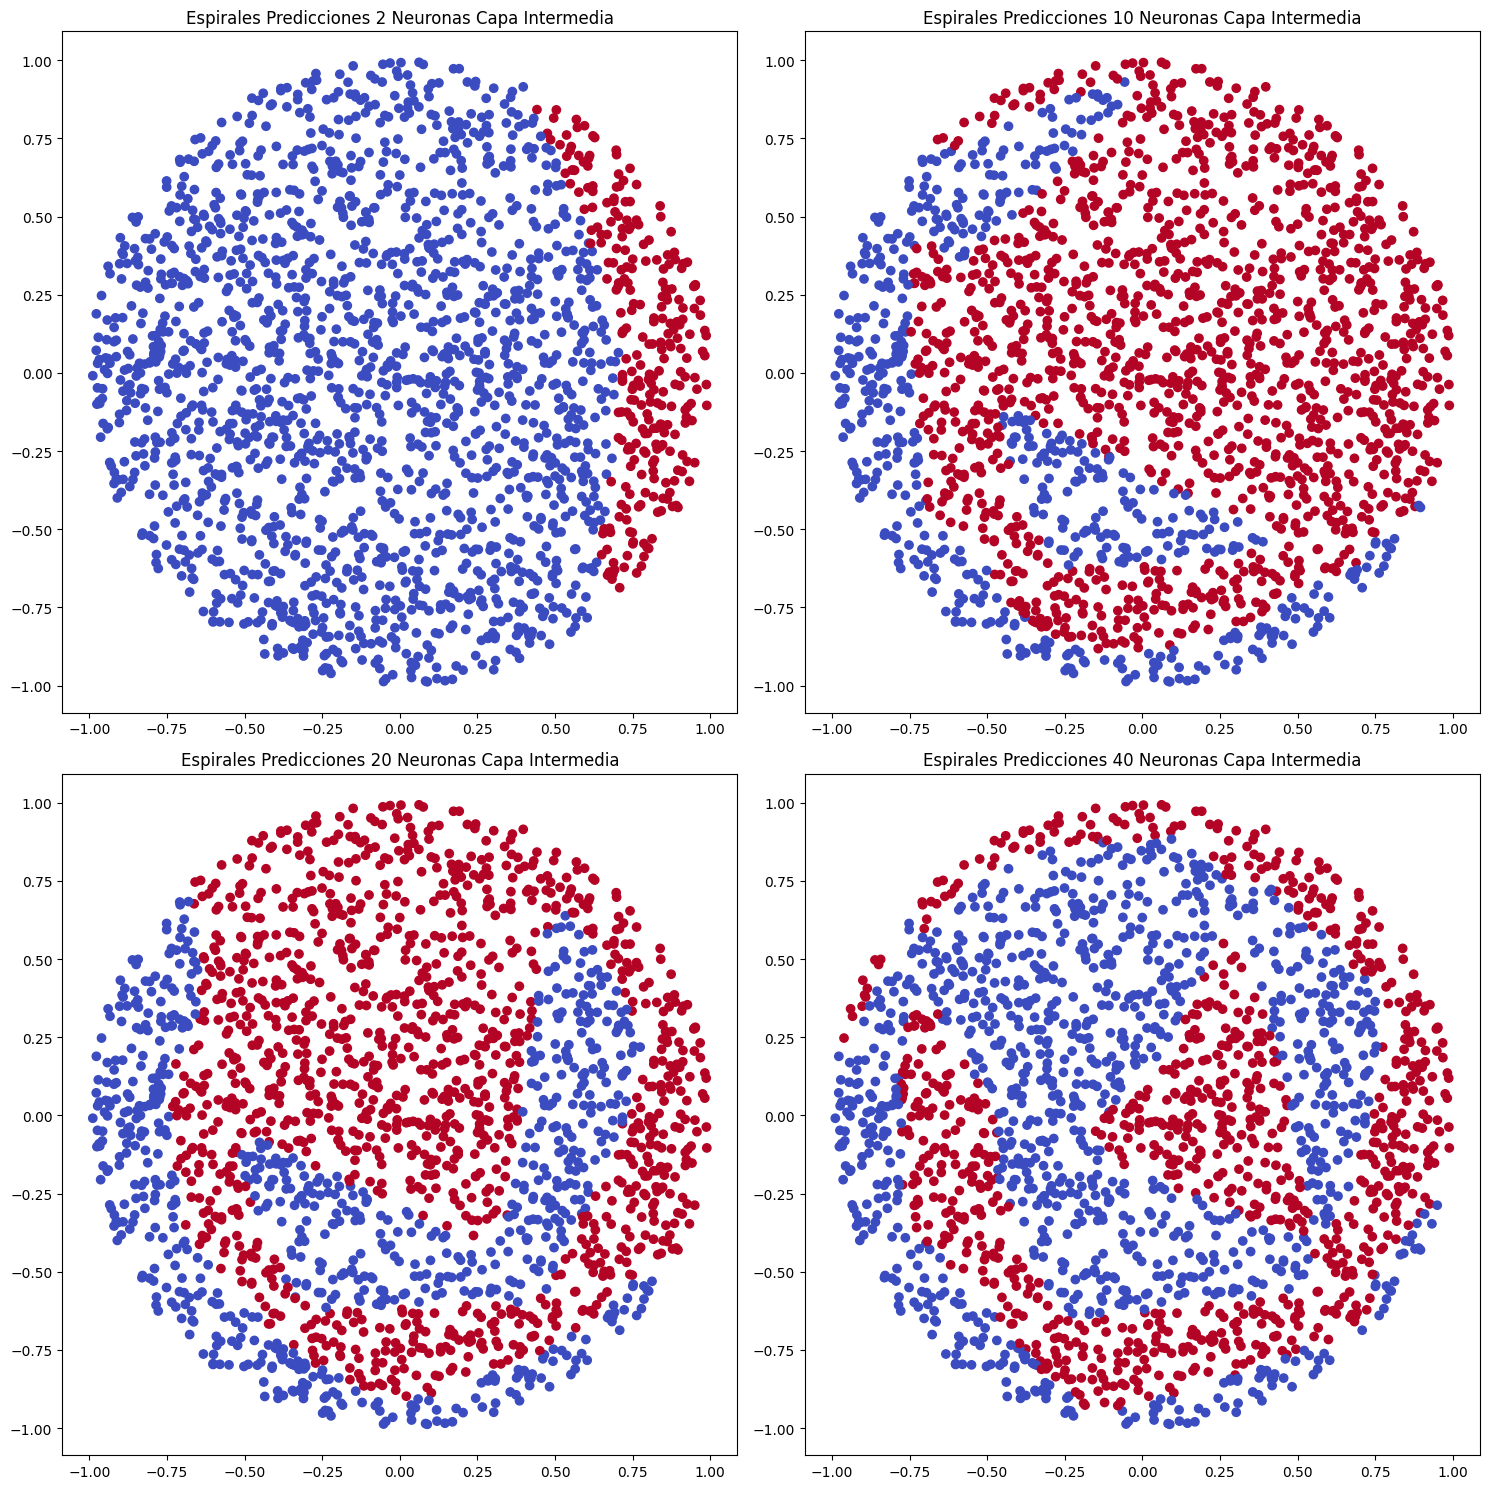

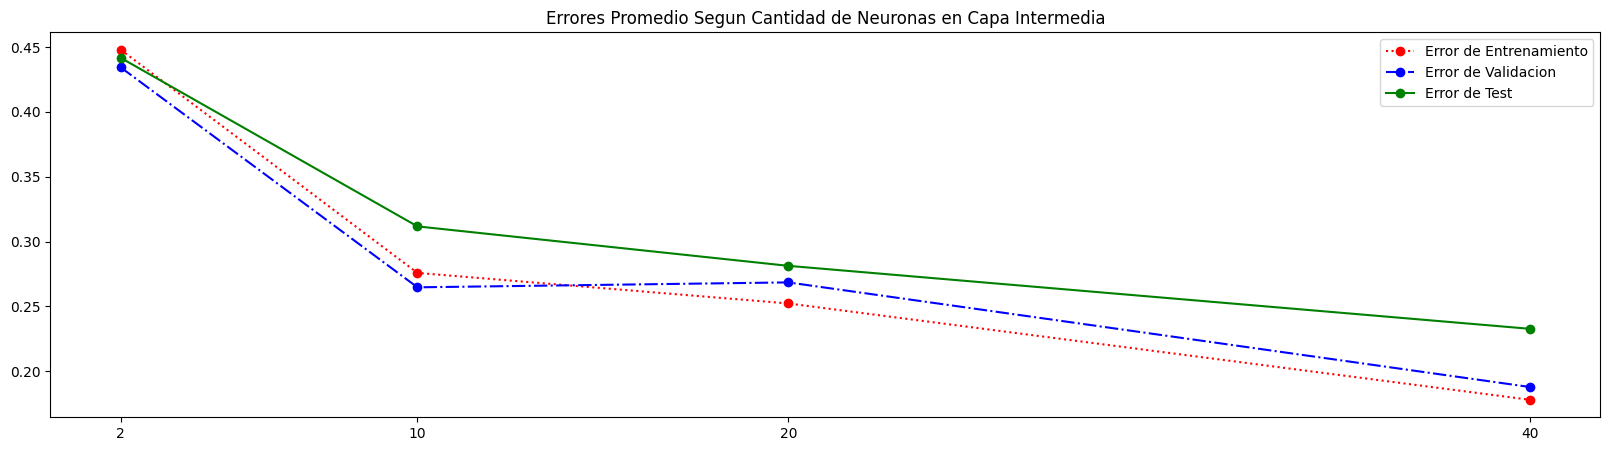

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for idx, N2 in enumerate(N2List):
    clasif = MLPClassif(N2, momentum, learning_rate, epochs)
    best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
    ax = axs[idx // 2, idx % 2]
    ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_red.predict(X_test), cmap='coolwarm')
    ax.set_title(f'Espirales Predicciones {N2} Neuronas Capa Intermedia')
    error_train_proms.append(np.mean(error_train))
    error_val_proms.append(np.mean(error_val))
    error_test_proms.append(np.mean(error_test))

plt.tight_layout()

fig_large, ax_large = plt.subplots(figsize=(20, 5))
ax_large.plot(N2List, error_train_proms, label='Error de Entrenamiento', color='red', linestyle=":", marker='o')
ax_large.plot(N2List, error_val_proms, label='Error de Validacion', color='blue', linestyle="-.", marker='o')
ax_large.plot(N2List, error_test_proms, label='Error de Test', color='green', linestyle="-", marker='o')
ax_large.set_xticks(N2List, labels=[str(N_2) for N_2 in N2List])
ax_large.legend()
ax_large.set_title('Errores Promedio Segun Cantidad de Neuronas en Capa Intermedia')

plt.show()


## Ejercicio 2


In [10]:
csv = pd.read_csv('DataSets/dos_elipses.data', names=['dim_0', 'dim_1', 'class']).sample(n=500)
X = csv.drop(columns=['class'])
y = csv['class']

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

csv = pd.read_csv('DataSets/dos_elipses.test', names=['dim_0', 'dim_1', 'class']).sample(n=2000)
X_test = csv.drop(columns=['class'])
y_test = csv['class']

In [11]:
N2 = 6
learning_rates = [0.1, 0.05, 0.01]
momentums = [0.55, 0.75, 0.95]
epochs = 50
evals = 300

In [12]:
table = []
best_reds = {}

for learning_rate in learning_rates:
    for momentum in momentums:
        aux_error_test_proms = []
        min_error_test = float('inf')
        for i in range(10):
            clasif = MLPClassif(N2, momentum, learning_rate, epochs)
            best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

            aux_error_test = error_clasificacion(y_test, best_red.predict(X_test))
            if aux_error_test < min_error_test:
                min_error_test = aux_error_test
                true_best_red = (best_red, error_train, error_val, error_test)

            aux_error_test_proms.append(aux_error_test)
            
        best_reds[(learning_rate,momentum)] = true_best_red
        table.append((learning_rate, momentum, np.mean(aux_error_test_proms), min_error_test))

print("Errores Test\n")
table = pd.DataFrame(table, columns=['Learning Rate', 'Momentum', 'Error Promedio', 'Error Minimo'])
print(table)

Errores Test

   Learning Rate  Momentum  Error Promedio  Error Minimo
0           0.10      0.55         0.08325        0.0165
1           0.10      0.75         0.07615        0.0170
2           0.10      0.95         0.12155        0.0440
3           0.05      0.55         0.10490        0.0115
4           0.05      0.75         0.08960        0.0175
5           0.05      0.95         0.12205        0.0460
6           0.01      0.55         0.19295        0.1880
7           0.01      0.75         0.19030        0.1595
8           0.01      0.95         0.07150        0.0175


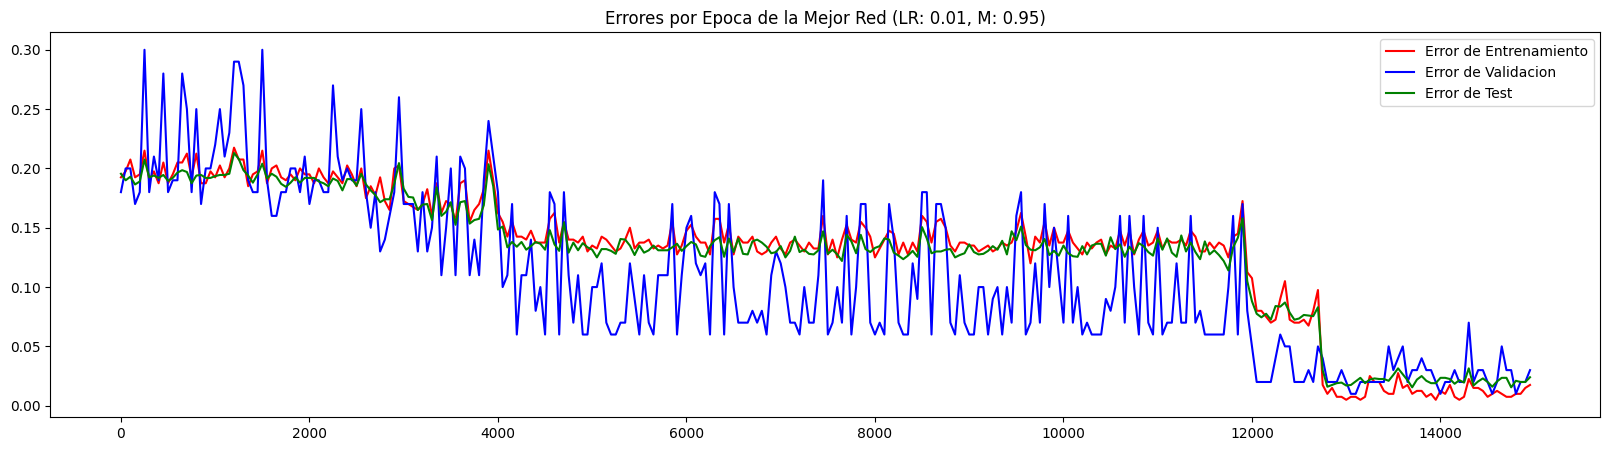

In [13]:
mejor_LR = 0.01
mejor_M = 0.95

fig_large, ax_large = plt.subplots(figsize=(20, 5))
best_red, error_train, error_val, error_test = best_reds[(mejor_LR, mejor_M)]
plot_errors(ax_large, error_train, error_val, error_test, epochs, evals, f'Errores por Epoca de la Mejor Red (LR: {mejor_LR}, M: {mejor_M})')

## Ejercicio 3

In [14]:
data = pd.DataFrame(np.loadtxt('DataSets/ikeda.data'))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/ikeda.test')).sample(n=2000)
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

In [15]:
N2 = 30
learning_rate = 0.01
momentum = 0.9
epochs = 50
evals = 400
test_sizes = [0.05, 0.25, 0.5]

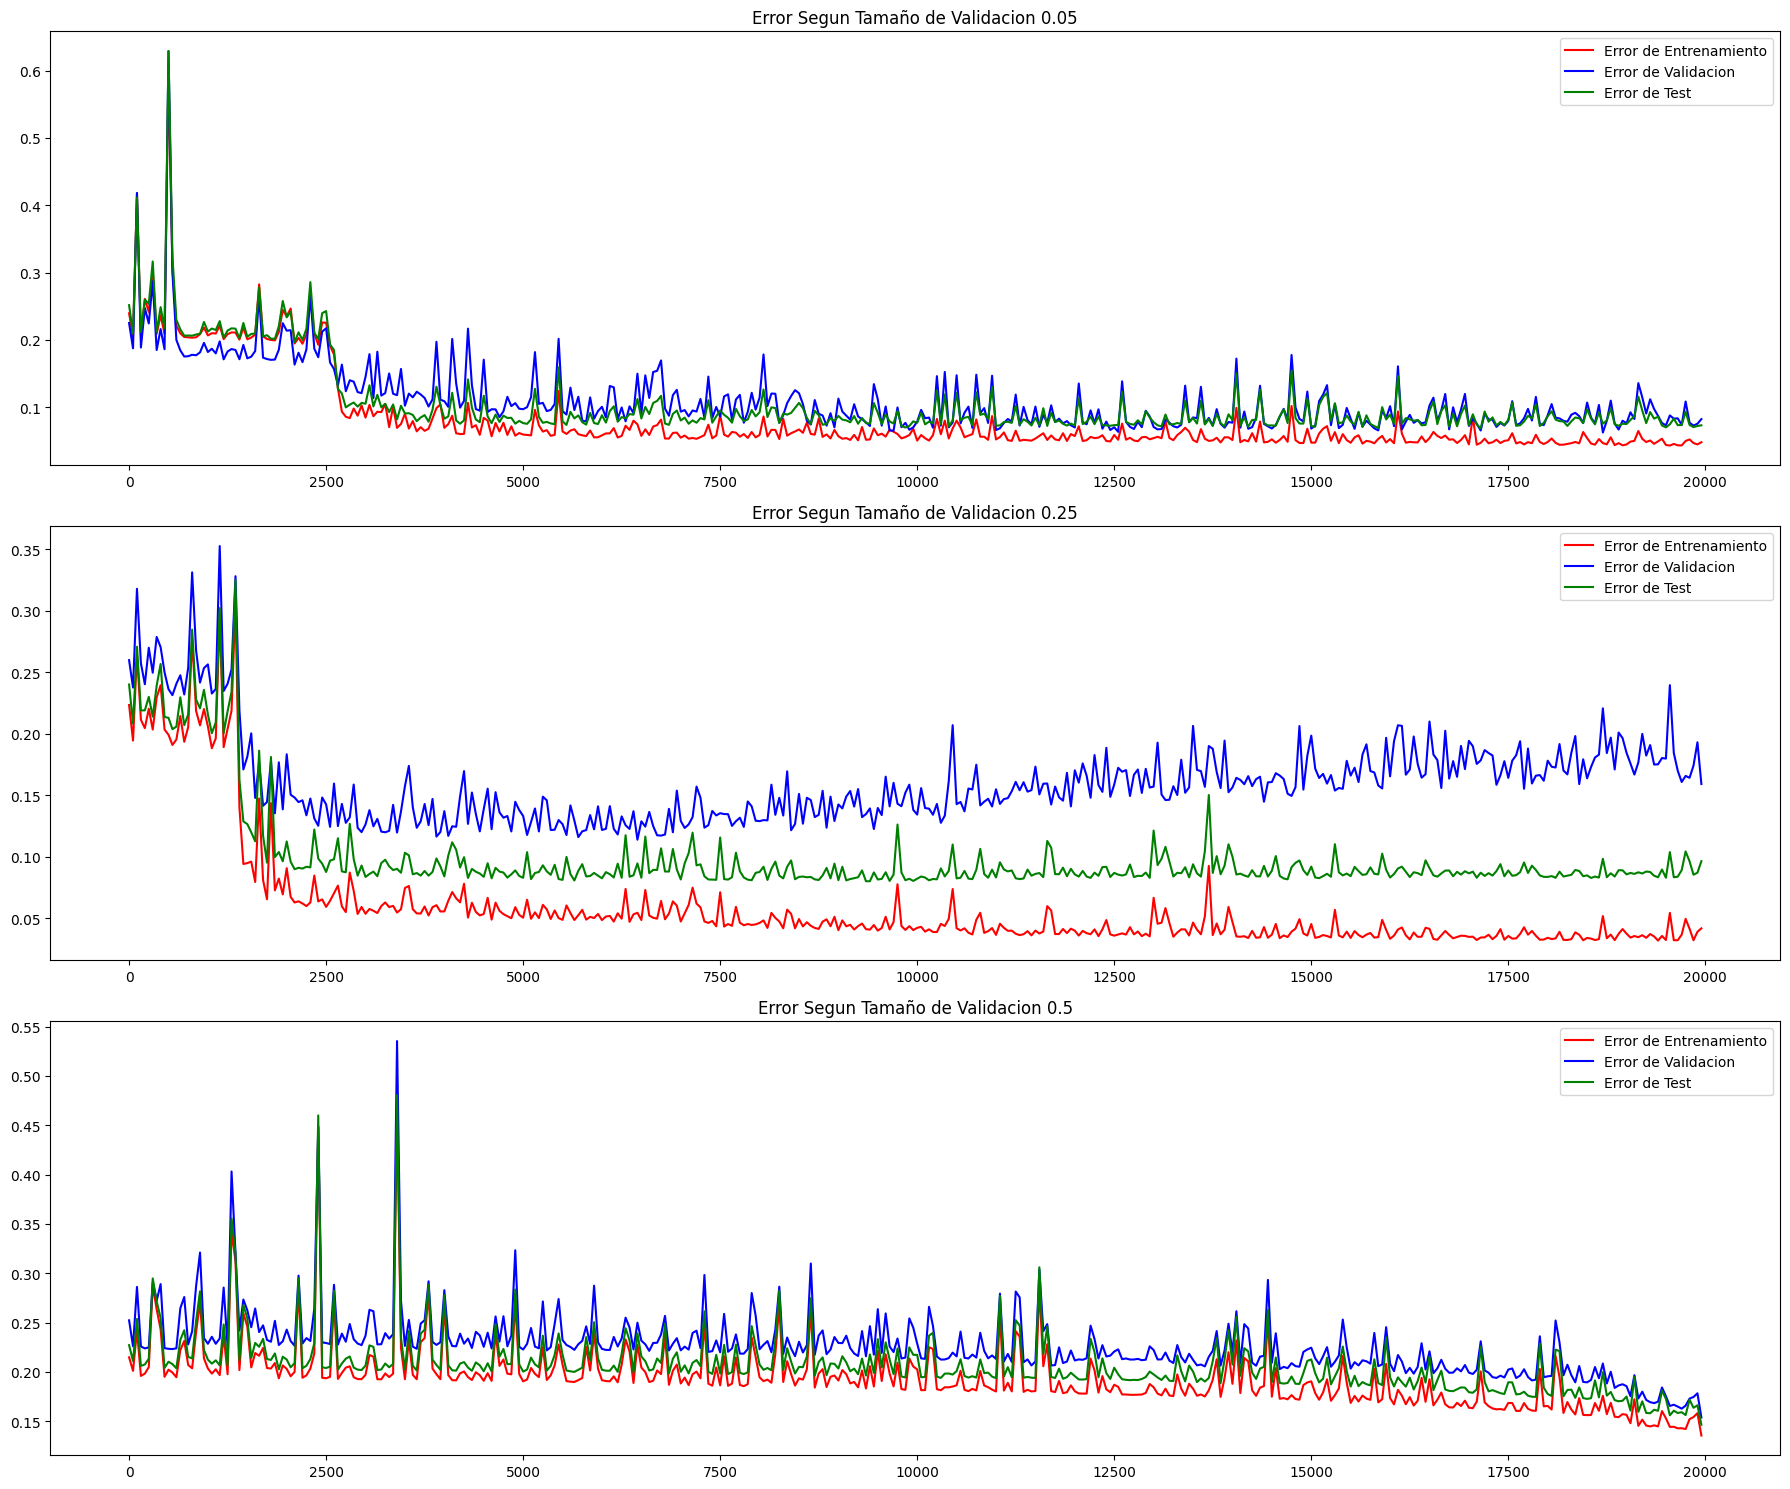

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(18, 15))

error_train_proms = []
error_val_proms = []
error_test_proms = []

for idx, test_size in enumerate(test_sizes):
        reg = MLPReg(N2, momentum, learning_rate, epochs)
        X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=test_size)
        best_red, error_train, error_val, error_test = entrenar_red_regresion(reg, evals, X_train, y_train, X_val, y_val, X_test, y_test)
        ax = axs[idx]
        plot_errors(ax, error_train, error_val, error_test, epochs, evals, f'Error Segun Tamaño de Validacion {test_size}')

plt.tight_layout()
plt.show()

## Ejercicio 4

In [25]:
N2 = 6
learning_rate = 0.05
momentum = 0.3
epochs = 20
evals = 4000
gammas = [(10**(-x)) for x in range(0, 7)]

In [26]:
def MLPRegEj4(N2, momentum, learning_rate, epochs, gamma):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

def entrenar_red_ej4(red, evaluaciones, X_train, y_train, X_test, y_test):
    error_train = []
    error_test = []
    weight_sum = []

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        weights = red.coefs_
        weight_sum.append(sum(np.sum(np.square(w)) for w in weights))
        error_train.append(sk.metrics.mean_squared_error(y_train, red.predict(X_train)))
        error_test.append(sk.metrics.mean_squared_error(y_test, red.predict(X_test)))

    return red, error_train, error_test, weight_sum

def plot_errors_ej4(ax, error_train, error_test, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    ax.plot(rango, error_test, label='Error de Test', color='green', linestyle="-")
    ax.legend()

def plot_weight_sum_ej4(ax, weight_sum, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, weight_sum, label='Suma de Pesos', color='blue', linestyle="-")
    ax.legend()

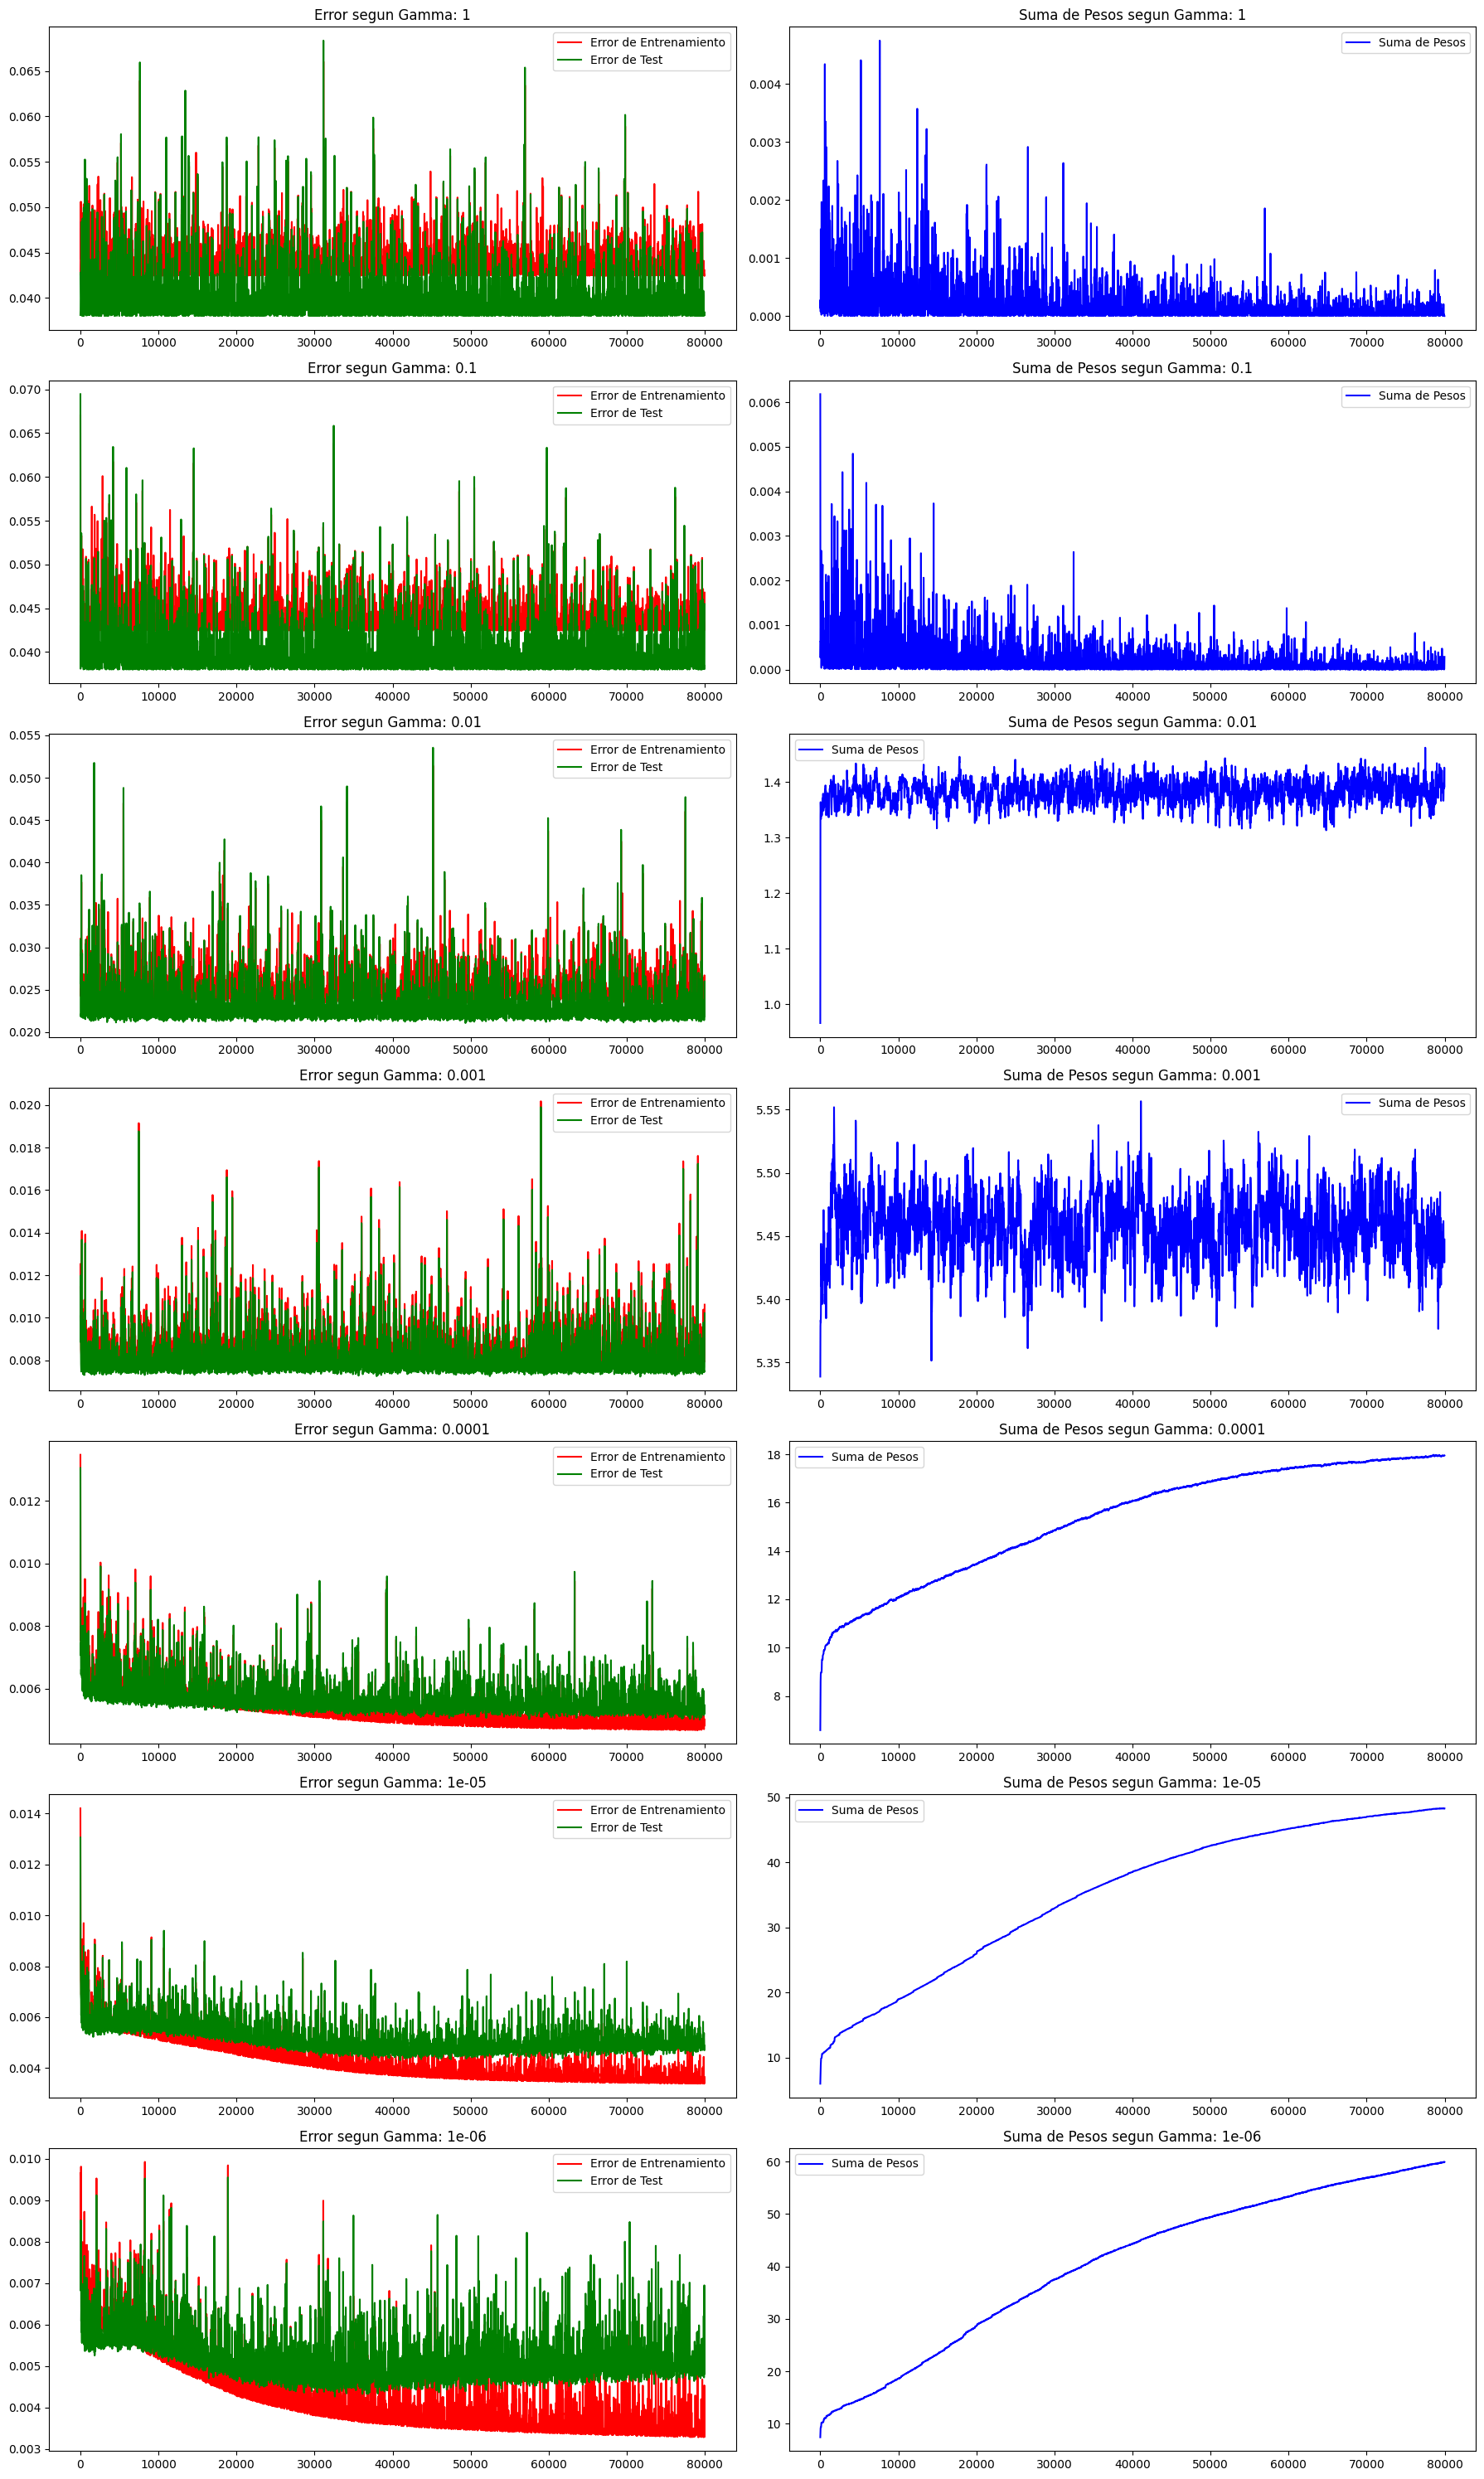

In [27]:
data = pd.DataFrame(np.loadtxt('DataSets/ssp.data', delimiter = ','))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/ssp.test', delimiter = ','))
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

fig, axs = plt.subplots(7, 2, figsize=(18, 30))
for idx, gamma in enumerate(gammas):
    reg = MLPRegEj4(N2, momentum, learning_rate, epochs, gamma)
    best_red, error_train, error_test, weight_sum = entrenar_red_ej4(reg, evals, X, y, X_test, y_test)
    plot_errors_ej4(axs[idx, 0], error_train, error_test, epochs, evals, f'Error segun Gamma: {gamma}')
    plot_weight_sum_ej4(axs[idx, 1], weight_sum, epochs, evals, f'Suma de Pesos segun Gamma: {gamma}')

plt.tight_layout()
plt.show()

## Ejercicio 5

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dimensiones = [2, 4, 8, 16, 32]
dataDiagonalesTree = []
dataParalelasTree = []
overlap = 0.78
testSamples = 10000

In [32]:
N2 = 6
learning_rate = 0.025
momentum = 0.85
epochs = 3#40
evals = 5#2000
dataDiagonalesRed = []
dataParalelasRed = []

### Diagonales

In [33]:
def diagonales(n, d, C):
  half = int(n/2)

  mClass0 = -np.ones(d)
  mClass1 = np.ones(d)
  covM = np.identity(d) * (C**2 * d)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

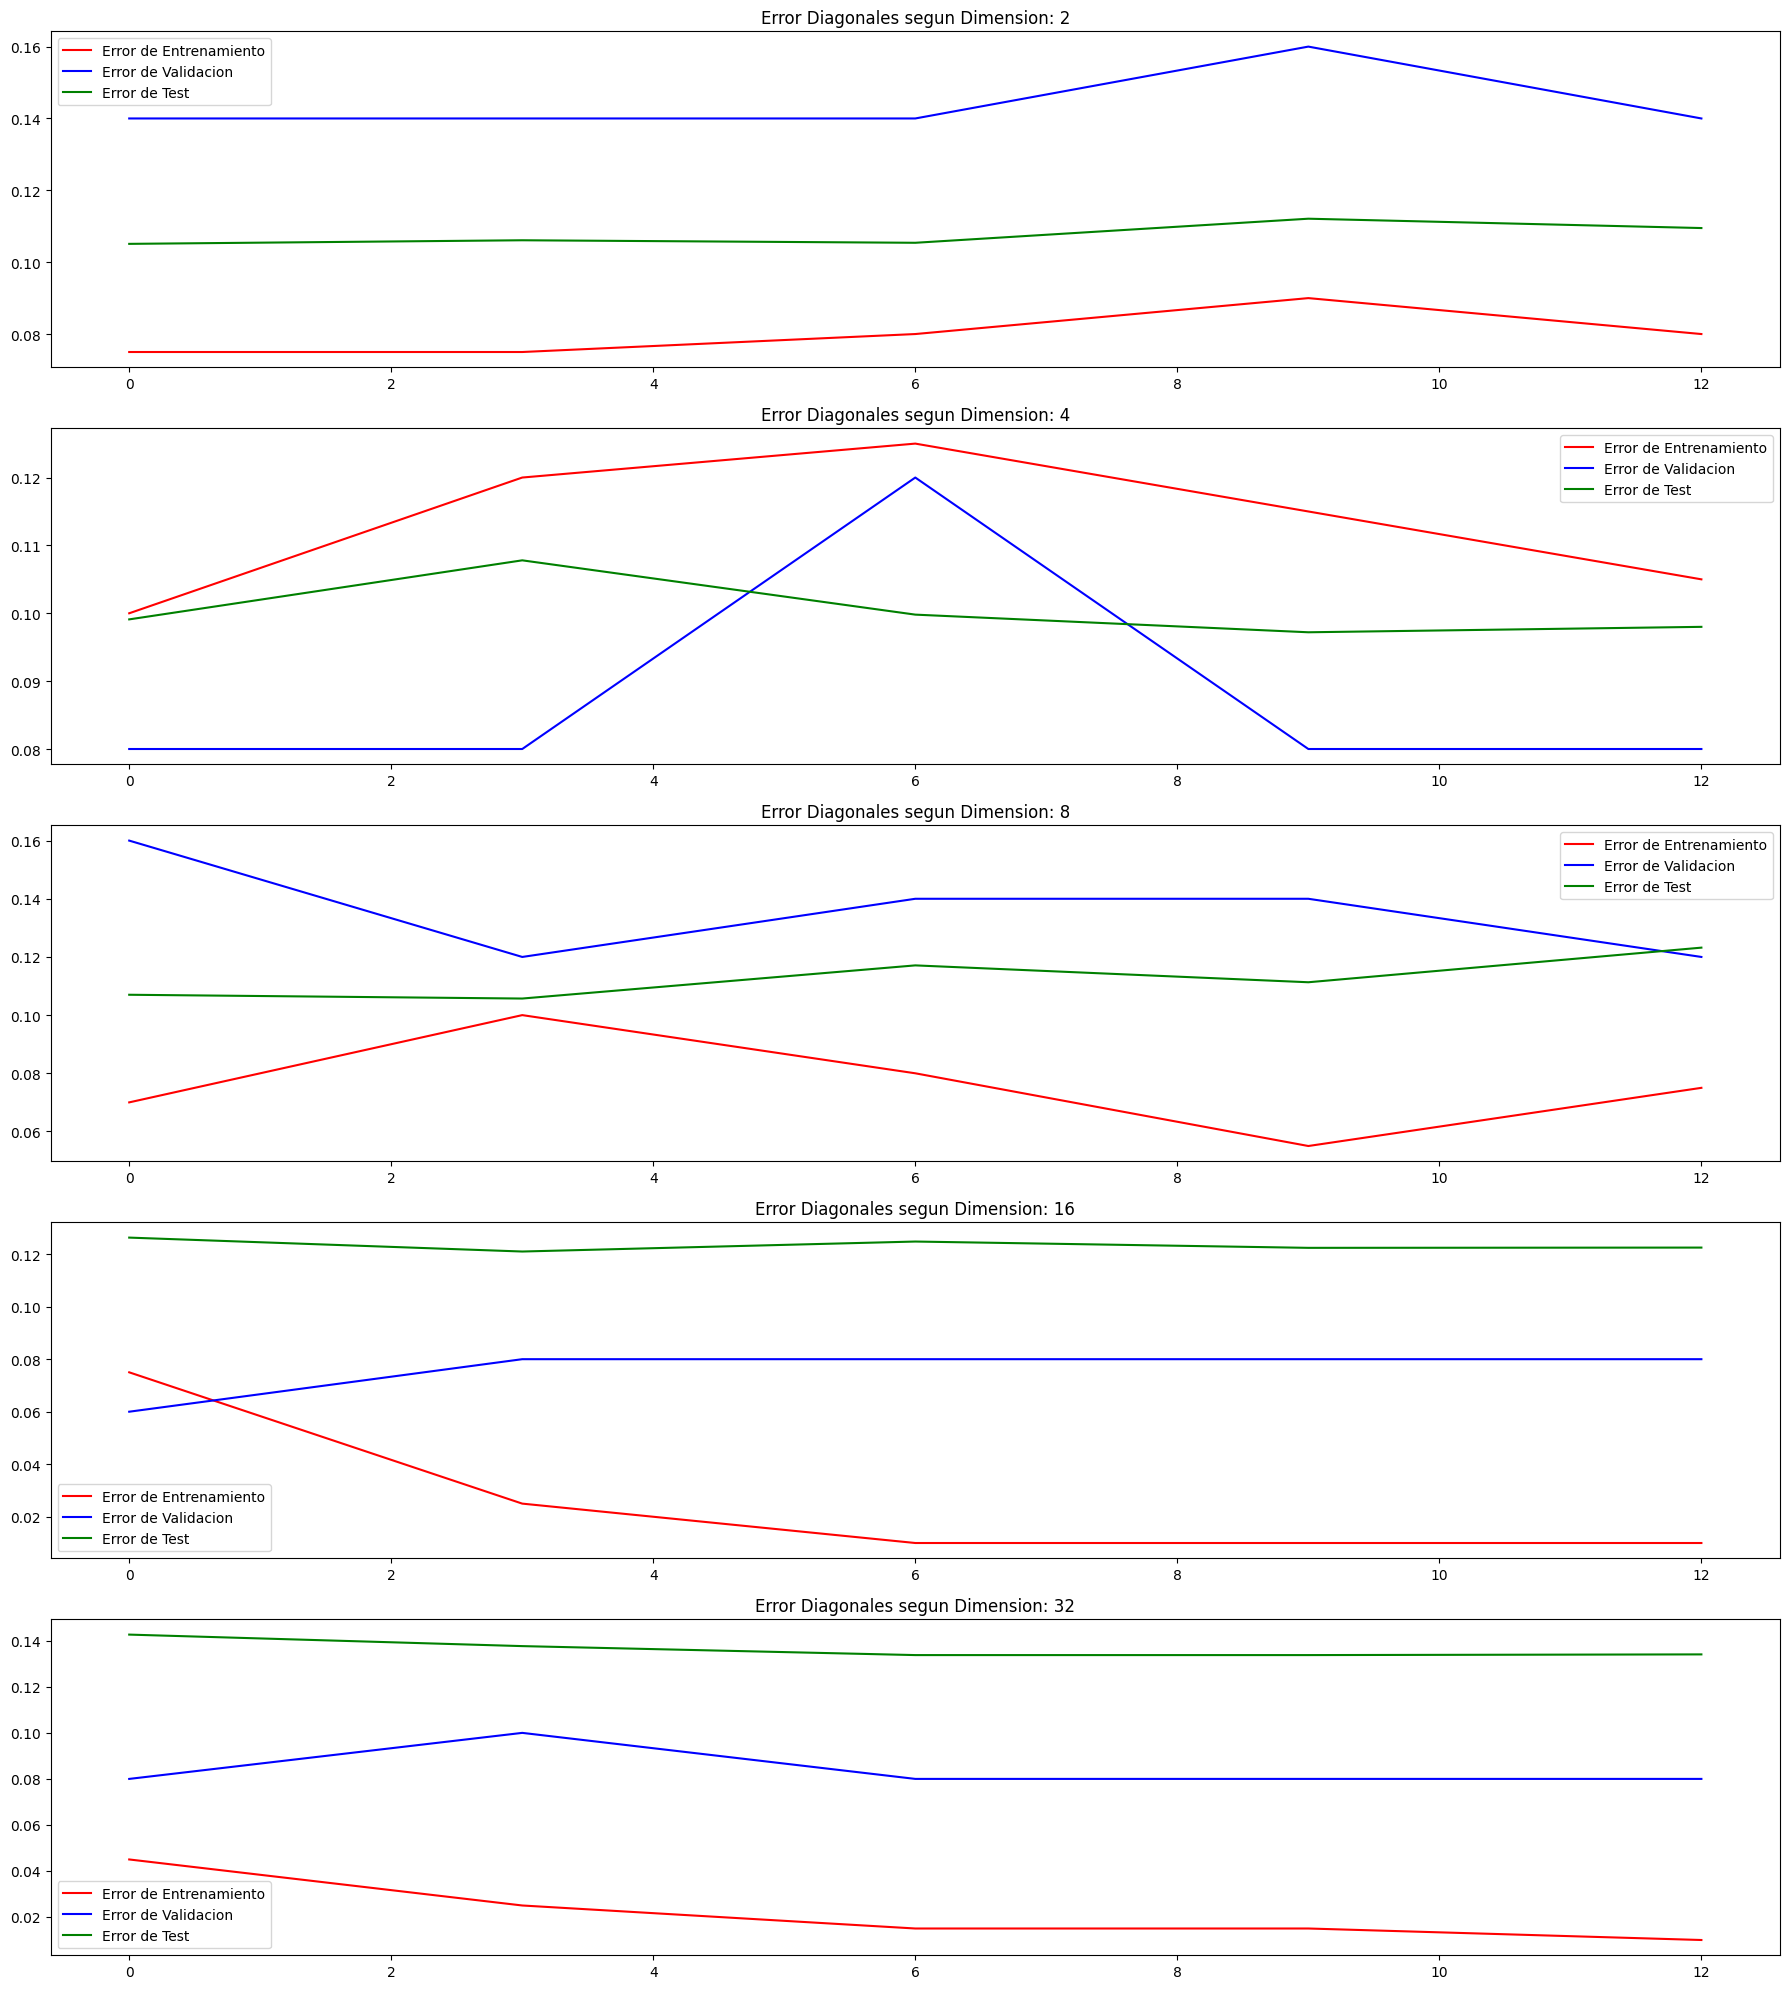

In [23]:
fig, axs = plt.subplots(5, 1, figsize=(18, 20))

for idx, dimension in enumerate(dimensiones):
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']

        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataDiagonalesTree.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

        clasif = MLPClassif(N2, momentum, learning_rate, epochs)
        X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)
        best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
        errTest = error_clasificacion(y_test, best_red.predict(X_test))
        errEntrenamiento = error_clasificacion(y, best_red.predict(X))
        dataDiagonalesRed.append([dimension, conjunto, errTest, errEntrenamiento])


plt.tight_layout()
plt.show()

### Paralelas

In [28]:
def paralelas(n, d, C):
  half = int(n/2)

  mClass0 = np.zeros(d)
  mClass0[0] = 1
  mClass1 = np.zeros(d)
  mClass1[0] = -1
  covM = np.identity(d) * (C**2)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

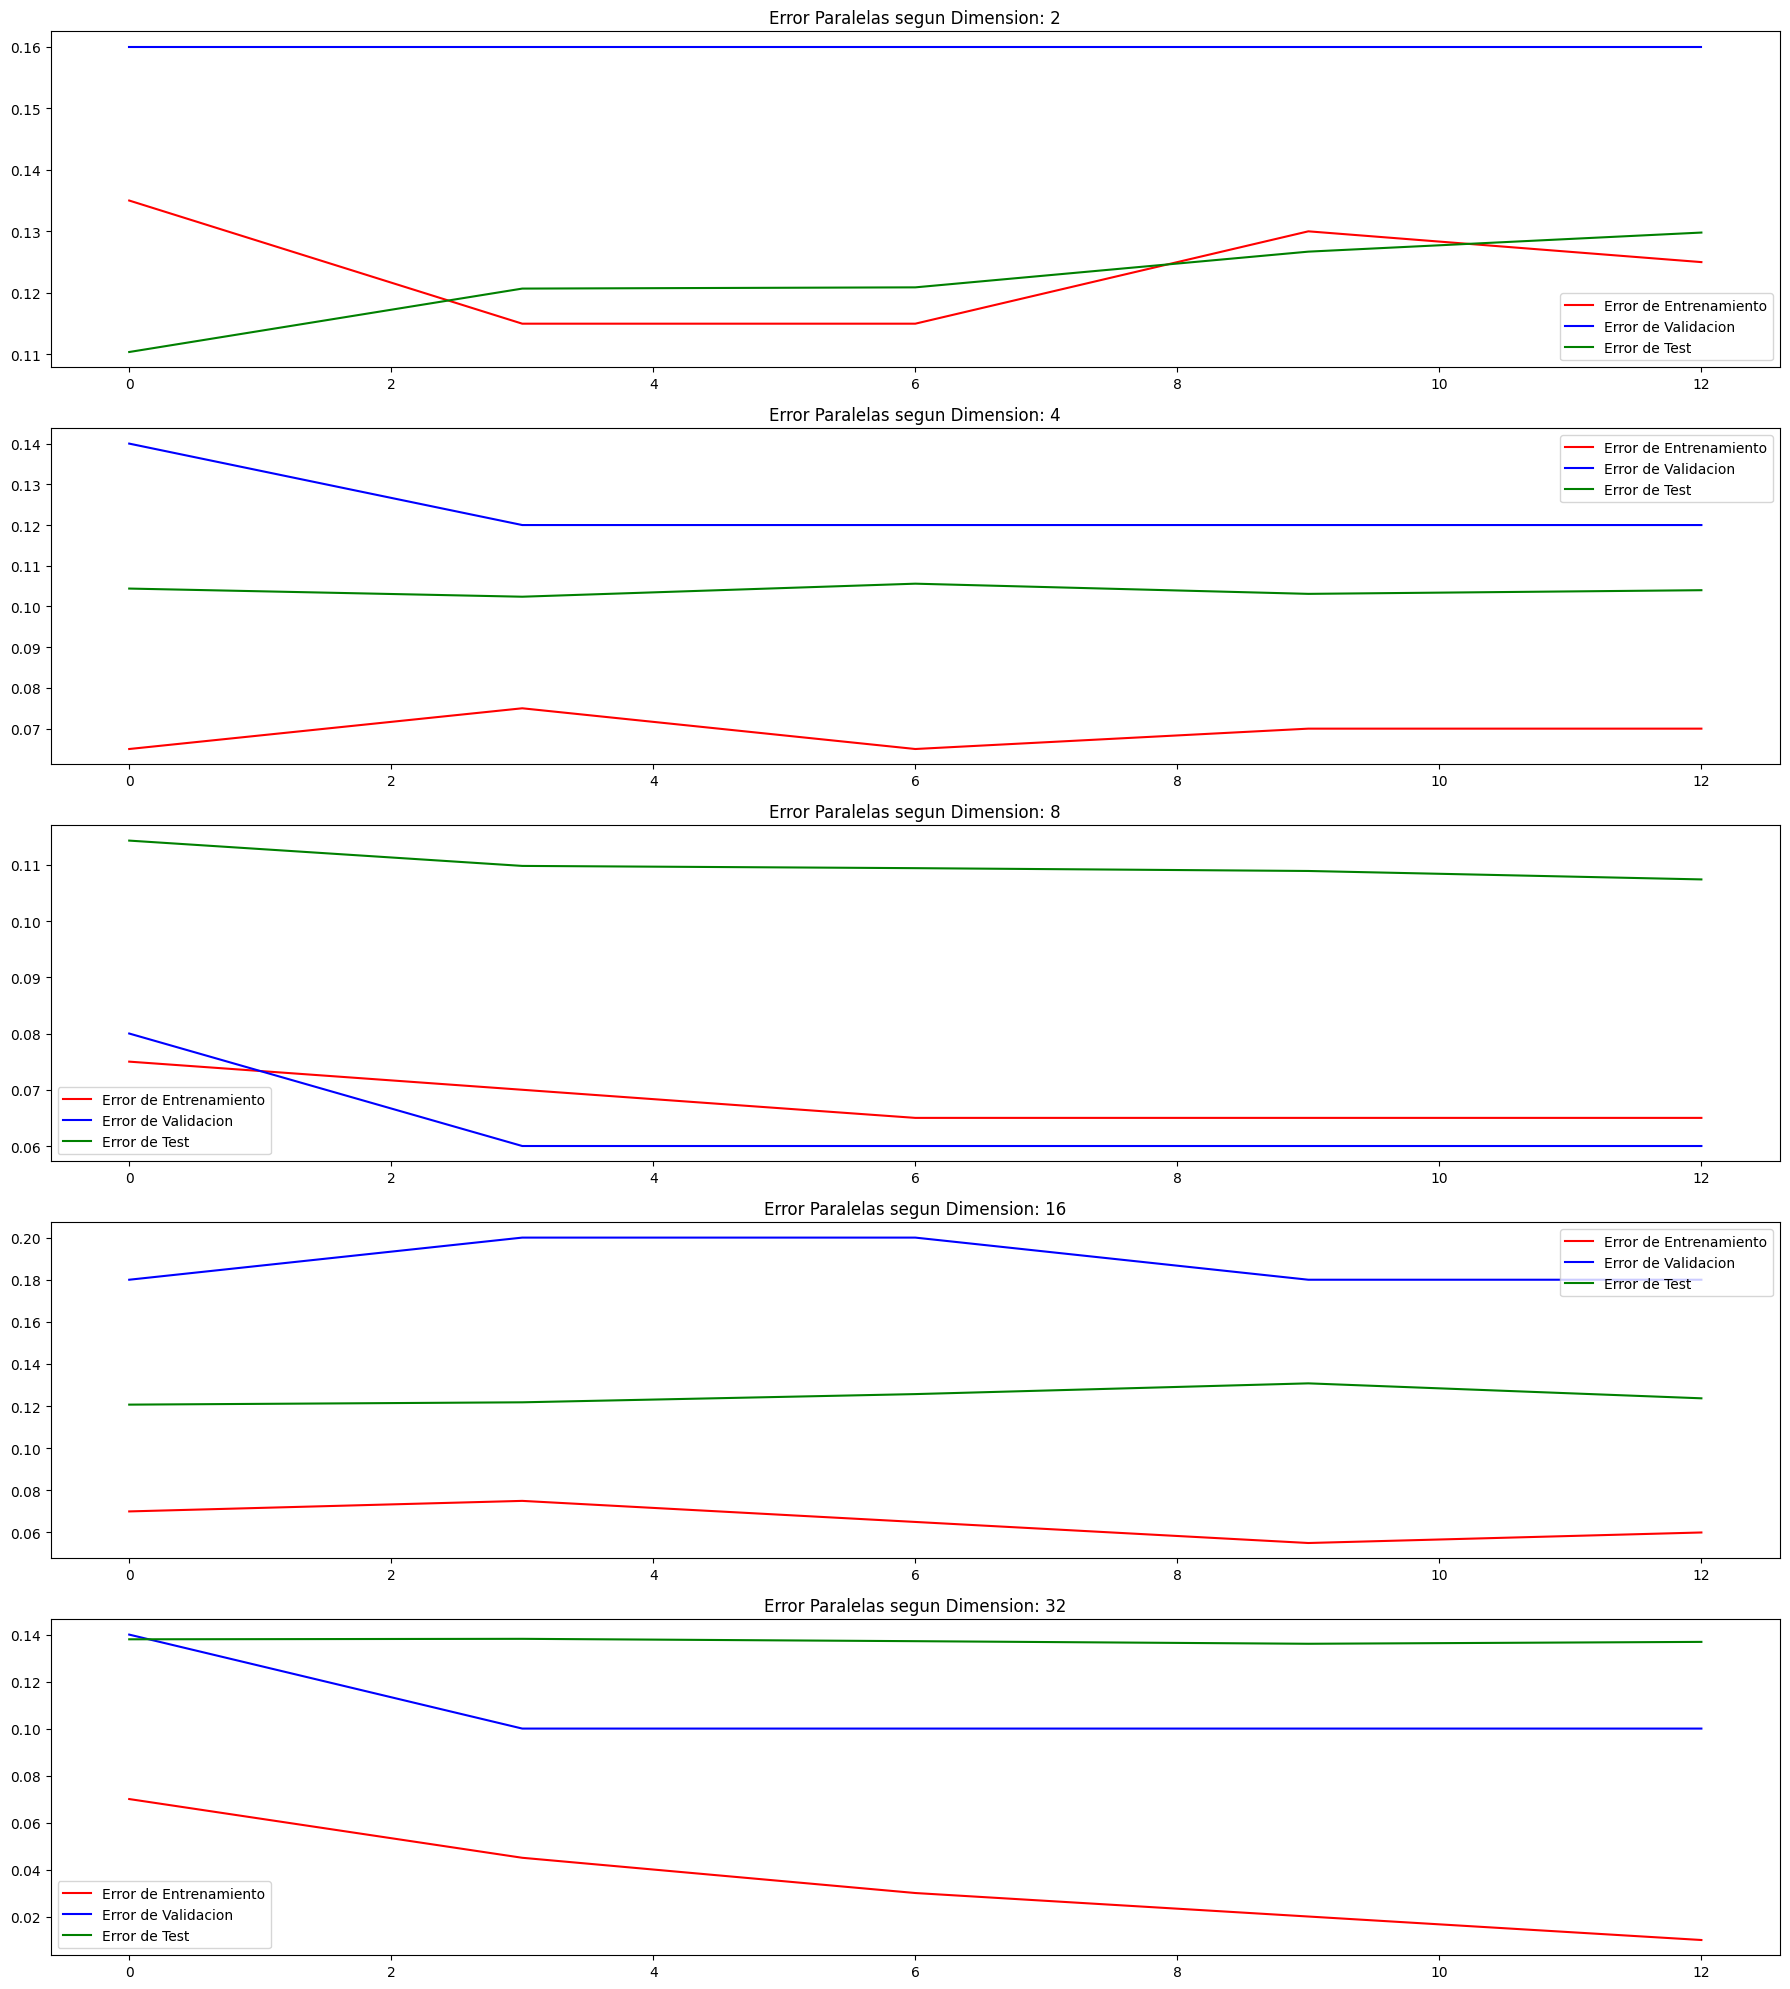

In [30]:
fig, axs = plt.subplots(5, 1, figsize=(18, 20))

for idx, dimension in enumerate(dimensiones):
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataParalelasTree.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

        clasif = MLPClassif(N2, momentum, learning_rate, epochs)
        X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)
        best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
        plot_errors(axs[idx], error_train, error_val, error_test, epochs, evals, f'Error Paralelas segun Dimension: {dimension}')

plt.tight_layout()
plt.show()

### Resultados

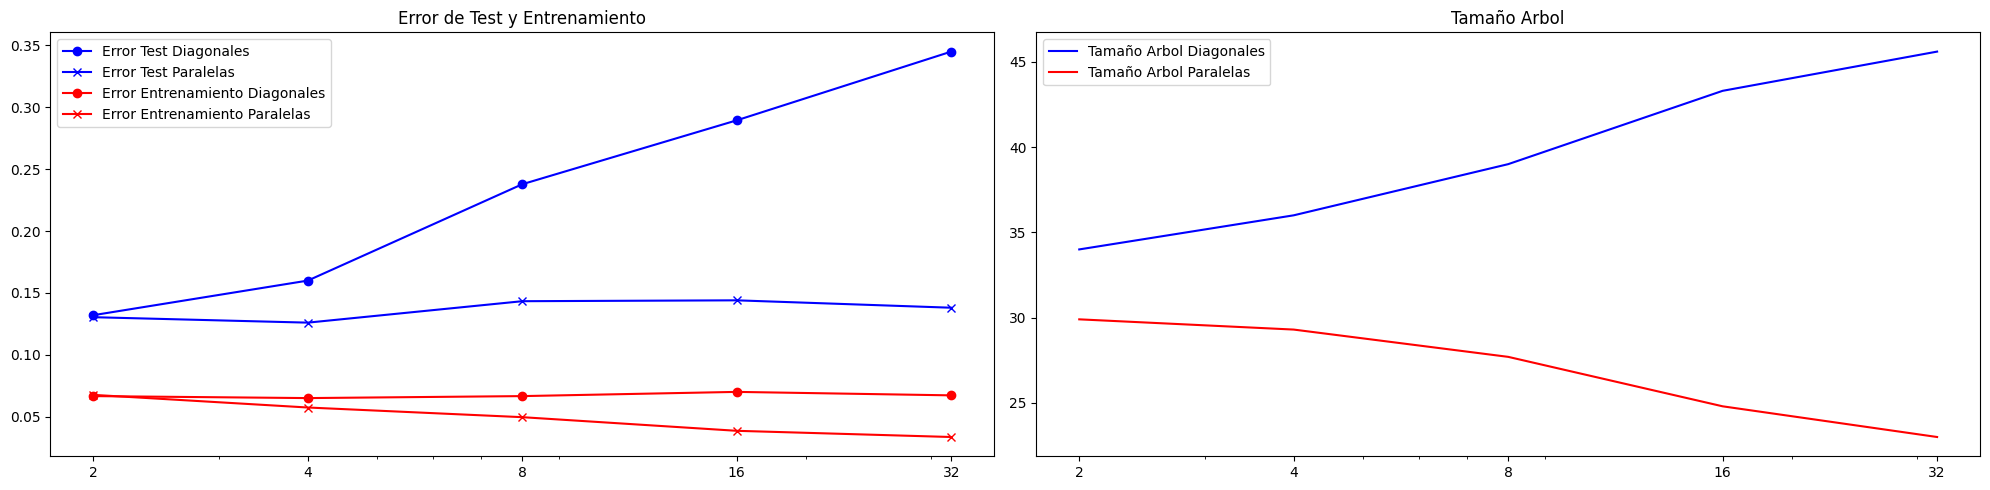

In [11]:
dfDiagonales = pd.DataFrame(dataDiagonalesTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
dfParalelas = pd.DataFrame(dataParalelasTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
promsErrTestDiagonales = dfDiagonales.groupby('dimension')['errTest'].mean()
promsErrTestParalelas = dfParalelas.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonales = dfDiagonales.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelas = dfParalelas.groupby('dimension')['errEntrenamiento'].mean()

treeSizeDiagonal = dfDiagonales.groupby('dimension')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('dimension')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(dimensiones, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='o', linestyle="-")
axs[0].plot(dimensiones, promsErrTestParalelas, c='blue', label='Error Test Paralelas', marker='x', linestyle="-")
axs[0].plot(dimensiones, promsErrEntrenamientoDiagonales, c='red', label='Error Entrenamiento Diagonales', marker='o', linestyle="-")
axs[0].plot(dimensiones, promsErrEntrenamientoParalelas, c='red', label='Error Entrenamiento Paralelas', marker='x', linestyle="-")
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_title('Error de Test y Entrenamiento')
axs[0].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[1].plot(dimensiones, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].plot(dimensiones, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

plt.tight_layout()
plt.show()